In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import matplotlib as mpl

# Define as configurações de fonte para usar LaTeX
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
from pcm import *
import utils

# Questão 1

Amostrar um sinal $x(t) = \sin (2\pi f t)$ e fazer modulação/demodulação PCM com $k$ bits de quantização.

Atentar para:

- Amostragem
- Quantização (uniforme)
- Codificação (binária)



## Quantização

$$Q(x_i , A, k) = A \cdot \lfloor \frac{x_i}{A} \cdot 2^k \rceil / 2^k$$ 

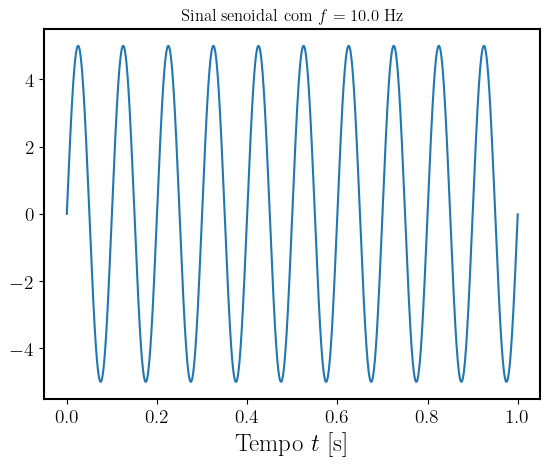

In [3]:
a = 5.0
k = 8
n = 2000
f = 10.0
ts = 1.0e-3 / (2.0*f)
t = np.arange(0.0, 1.0, step=ts)
s = a * np.sin(2*np.pi*f*t)

plt.plot(t, s)
plt.title(f"Sinal senoidal com $f={f}$ Hz")
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig(f'sinal_senoidal_{f}Hz.eps')

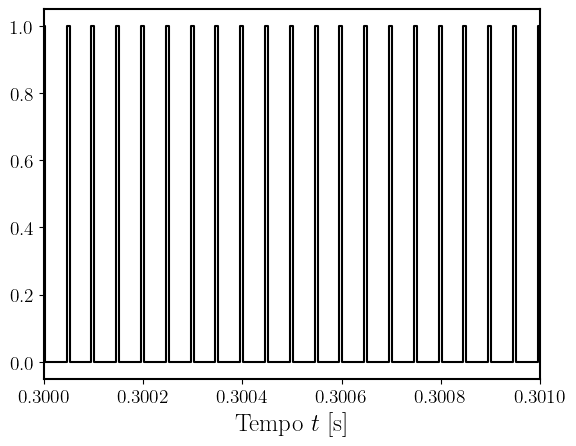

In [10]:
utils.pcm_plot(0.0, 1.0, s, a, k)
plt.xlim(0.3, 0.301)
plt.savefig('pcm_sinal_senoidal_8_bits.eps')

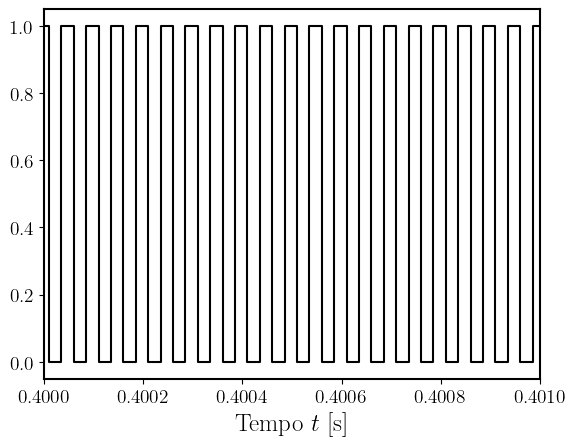

In [11]:
utils.pcm_plot(0.0, 1.0, s, a, 2)
plt.xlim(0.4, 0.401)
plt.savefig('pcm_sinal_senoidal_2_bits.eps')

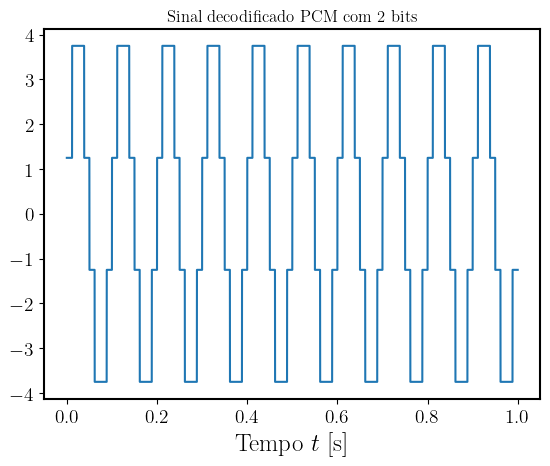

In [6]:
x_m = pcm_codification(pcm_quantization(s, a, 2), 2)
fs = 1 / ts
fc = 20.0
decoded = pcm_decodification(x_m, a, 2)
plt.plot(t, decoded)
plt.title(r'Sinal decodificado PCM com 2 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_senoidal_decodificado_2_bits.eps')

## Demodulação

$$x^*(t) = \sum_{n=-\infty}^{\infty} x_d(n) \text{sinc}(t/T_s - n)$$

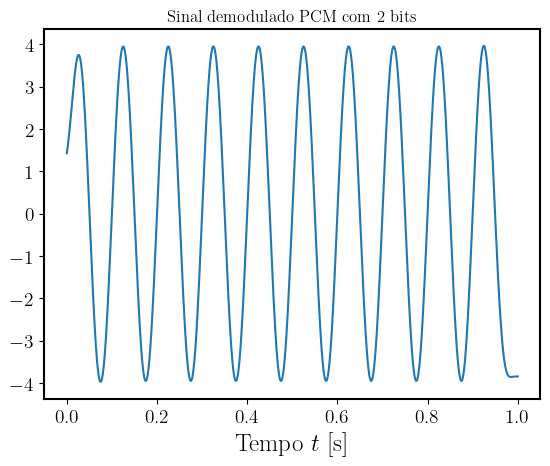

In [7]:
demodulated = pcm_demodulation(decoded, fc, fs)
plt.plot(t, demodulated)
plt.title(r'Sinal demodulado PCM com 2 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_senoidal_demodulado_2_bits.eps')

# Questão 2

Repita o procedimento anterior considerando um  ́audio (sugestão “train”) como sinal de entrada.

In [8]:
# Carregar áudio
fs, x = wavfile.read('steam_train.wav')
# Como o áudio é estéreo, vamos pegar apenas um canal
x = x[:, 0]
a = np.max(np.abs(x))
x_q = quantization_index(x, a, 8)
pcm_plot(x_q)
plt.xlim(3000, 3200)
plt.savefig('results/steam_train_8_bit.eps', dpi=300)


NameError: name 'quantization_index' is not defined

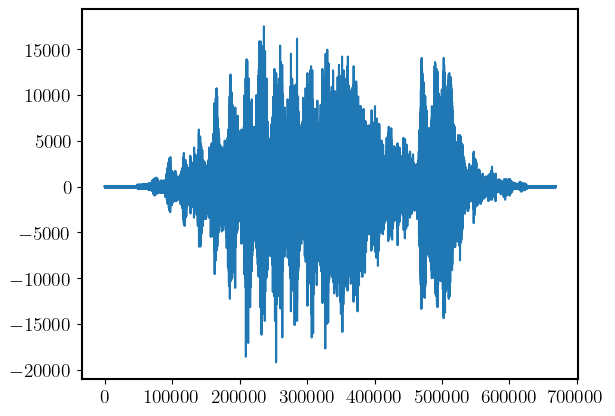

In [ ]:
#
decoded = pcm_decodification(x_q, a, 8)
plt.plot(decoded)

In [ ]:
# DM modulation/demodulation

def dm_modulation(x, k):
    x_q = np.diff(x) <= 0
    x_q = x_q[]
    # convert diff to 0(if dx<= 0) or 1(if dx>0)


SyntaxError: invalid syntax (838889484.py, line 5)

In [ ]:
signal = np.random.uniform(-5.0, 5.0, size=10)
print(f"signal = {signal}")
y = np.concatenate(([0.0], (np.diff(signal) > 0).astype(float)))
print(f"DM(y) = {y}")

signal = [ 0.57730032 -3.87334522  3.75089825  2.17555786  1.9813839  -4.42327987
 -1.08428195 -0.00750996 -4.17598276  0.50707731]
DM(y) = [0. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
